<a href="https://colab.research.google.com/github/jeetshah0303/Artificialintelligence/blob/main/PAD_LAB4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_lfw_people 
import matplotlib.pyplot as plt
faces = fetch_lfw_people(min_faces_per_person=80)

In [2]:
 _, h, w = faces.images.shape 
 target_names = faces.target_names

In [3]:
 print(faces.target_names)

['Colin Powell' 'Donald Rumsfeld' 'George W Bush' 'Gerhard Schroeder'
 'Tony Blair']


In [4]:
print(faces.images.shape)

(1140, 62, 47)


In [5]:
 # Create the model
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [6]:
pca = RandomizedPCA(n_components=100, whiten=True, random_state=1) 
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [7]:
 # Split the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,random_state=1)

In [8]:
 model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=100,
                     random_state=1, svd_solver='auto', tol=0.0, whiten=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200,
                     class_weight='balanced', coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [9]:

y_pred = model.predict(X_test)

In [10]:
 from sklearn.metrics import classification_report 
 print(classification_report(y_test, y_pred, target_names = faces.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.88      0.92      0.90        53
  Donald Rumsfeld       0.76      0.76      0.76        21
    George W Bush       0.88      0.94      0.91       139
Gerhard Schroeder       0.93      0.74      0.83        35
       Tony Blair       0.88      0.76      0.81        37

         accuracy                           0.87       285
        macro avg       0.86      0.82      0.84       285
     weighted avg       0.87      0.87      0.87       285



In [11]:
def plot_gallery(images, titles, h,w, rows=3, cols =4): 
  plt.figure(figsize=(10,10))
  for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.imshow(images[i].reshape(h,w),cmap=plt.cm.gray) 
    plt.title(titles[i])
    plt.xticks(())
    plt.yticks(())

In [12]:
def titles(y_pred,y_test,target_names): 
  for i in range(y_pred.shape[0]):
    pred_name = target_names[y_pred[i]].split(' ')[-1]
    true_name = target_names[y_test[i]].split(' ')[-1]
    yield 'predicted: {0}\ntrue: {1}'.format(pred_name,true_name)

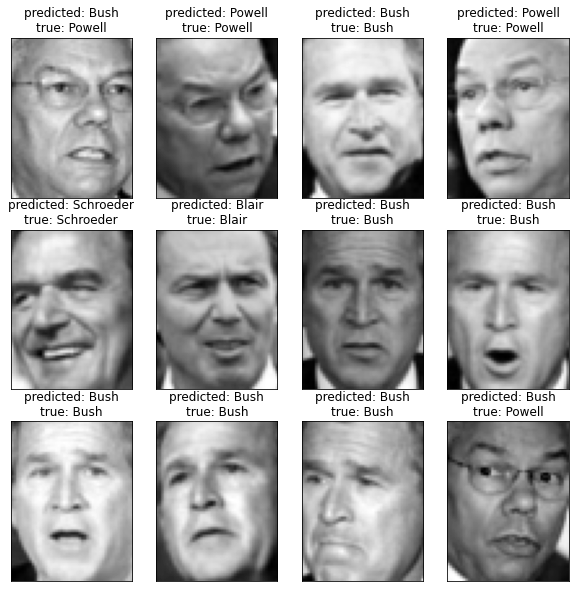

In [13]:
prediction_titles = list(titles(y_pred, y_test, target_names)) 
plot_gallery(X_test, prediction_titles, h,w)